In [2]:
# Import Modules
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [4]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('../Resources/credit_data.csv')
df

,id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,2,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,3,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,4,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,5,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,997,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,998,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,999,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [7]:
# Split target column from dataset
y= df['credit_risk']
X=df.copy()
del X['credit_risk']
del X['id']
X

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,>= 7 yrs,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,co-applicant,< 1 yr,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,none,>= 7 yrs,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,none,< 1 yr,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no


In [8]:
# Preview the data
X

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,>= 7 yrs,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,co-applicant,< 1 yr,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,none,>= 7 yrs,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,none,< 1 yr,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no


In [9]:
# Print first five entries for target
y.head()

0    good
1    good
2    good
3    good
4    good
Name: credit_risk, dtype: object

In [11]:
# Encode the categorical variables using get_dummies
new_X = pd.get_dummies(X)

In [12]:
# Preview the data
new_X.head()

,duration,amount,age,status_... < 0 DM,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,...,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_0 to 2,people_liable_3 or more,telephone_no,telephone_yes (under customer name),foreign_worker_no,foreign_worker_yes
0,18,1049,21,0,0,0,1,1,0,0,...,0,1,0,0,1,0,1,0,1,0
1,9,2799,36,0,0,0,1,1,0,0,...,0,1,0,0,0,1,1,0,1,0
2,12,841,23,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
3,12,2122,39,0,0,0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,1
4,12,2171,38,0,0,0,1,1,0,0,...,0,0,0,1,1,0,1,0,0,1


In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(new_X, y)

In [19]:
# Display shape of X_train
X_train.shape

(750, 67)

In [20]:
# Display s hape of X_test
X_test.shape

(250, 67)

In [22]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler() model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Instantiate the model with k = 3 neighbors
knn = KNeighborsClassifier(n_neighbors=1)

In [50]:
# Train the model
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.668


In [51]:
# Create predictions
predictions = knn.predict(X_test_scaled)
# Review the predictions
predictions

array(['good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good',
       'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'bad', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good',

In [52]:
# Print confusion matrix
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual bad", "Actual good"], columns=["Predicted bad", "Predicted good"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [53]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")


Confusion Matrix


,Predicted bad,Predicted good
Actual bad,34,56
Actual good,27,133


Accuracy Score : 0.668


In [54]:
# Print classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

         bad       0.56      0.38      0.45        90
        good       0.70      0.83      0.76       160

    accuracy                           0.67       250
   macro avg       0.63      0.60      0.61       250
weighted avg       0.65      0.67      0.65       250



k: 1, Train/Test Score: 1.000/0.668
k: 3, Train/Test Score: 0.857/0.672
k: 5, Train/Test Score: 0.824/0.656
k: 7, Train/Test Score: 0.808/0.664
k: 9, Train/Test Score: 0.792/0.668
k: 11, Train/Test Score: 0.792/0.656
k: 13, Train/Test Score: 0.781/0.652
k: 15, Train/Test Score: 0.779/0.636
k: 17, Train/Test Score: 0.779/0.652
k: 19, Train/Test Score: 0.765/0.648


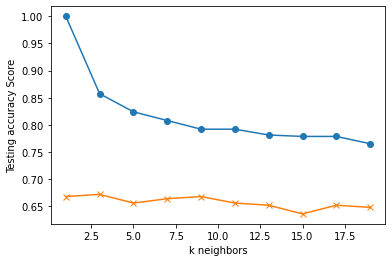

In [47]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()